# Foundations of Data Mining: Assignment 1

Please complete all assignments in this notebook. You should submit this notebook, as well as a PDF version (See File > Download as).

In [3]:
%matplotlib inline

#Student 1: Qifan Dai, 1034548
#Student 2: Jiyang Li, 0975662

from preamble import *
plt.rcParams['savefig.dpi'] = 100
InteractiveShell.ast_node_interactivity = "all"

## Handwritten digit recognition (5 points, 1+2+2)
The [MNIST dataset](https://www.openml.org/d/554) contains 70,000 images of handwritten digits (0-9) represented by 28 by 28 pixel values. We can easily download it from OpenML and visualize one of the examples:

In [5]:
# This is a temporary read-only OpenML key. Replace with your own key later. 
oml.config.apikey = 'e8bb9b0abb1f11aa099be170f147edf7'

In [9]:
mnist_data = oml.datasets.get_dataset(554) # Download MNIST data
X, y = mnist_data.get_data(target=mnist_data.default_target_attribute); # Get the predictors X and the labels y


- Evaluate a k-Nearest Neighbor classifier with its default settings.
    - Use the first 60,000 examples as the training set and the last 10,000 as the test set
    - What is the predictive accuracy?
    - Find a few misclassifications, and plot them together with the true labels (as above). Are these images really hard to classify?
- Optimize the value for the number of neighbors $k$ (keep $k$ < 50) on a stratified subsample (e.g. 10%) of the data
    - Use 10-fold crossvalidation and plot $k$ against the misclassification rate. Which value of $k$ should you pick?
    - Do the same but with 100 bootstrapping repeats. Are the results different? Explain.
- Compare kNN against the linear classification models that we have covered in the course (logistic regression and linear SVMs).
    - First use the default hyperparameter settings.
    - Next, optimize for the degree of regularization ($C$) and choice of penalty (L1/L2). Again, plot the accuracy while increasing the degree of regularization for different penalties. Interpret the results. 
    - Report is the optimal performance. Can you get better results than kNN?
    
Report all results clearly and interpret the results.  
Note: while prototyping/bugfixing, you can speed up experiments by taking a smaller sample of the data, but report your results as indicated above.

In [12]:
#Use the first 60,000 examples as the training set and the last 10,000 as the test set
#What is the predictive accuracy?



from sklearn import neighbors
import numpy as np

searchpoints=20
#Split the data into 60000 training dataset and 10000 test dataset.
X_train, X_test = np.split(X,[60000])
y_train, y_test = np.split(y,[60000])
knn = neighbors.KNeighborsClassifier()

# record training and test set accuracy
training_accuracy=knn.fit(X_train, y_train).score(X_train, y_train)
test_accuracy=knn.fit(X_train, y_train).score(X_test, y_test)

print('training_accuracy: %f' % training_accuracy)
print('test_accuracy: %f' % test_accuracy)

pred=knn.predict(X_test)

training_accuracy: 0.981917
test_accuracy: 0.968800


In [1]:
X_train.shape

NameError: name 'X_train' is not defined

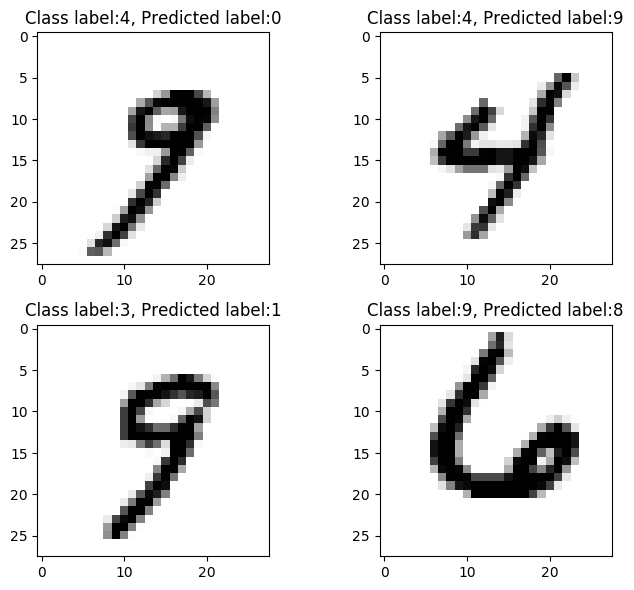

In [6]:
#Find a few misclassifications, and plot them together with the true labels (as above). 
#Are these images really hard to classify?
import matplotlib
import matplotlib.pyplot as plt
#We want to plot 4 misclassifiction datapoints
afew=4
j=1
i=1
#We creat subplots to store  4 misclassifiction points
fig, axes=plt.subplots(2,2, figsize=(7,6))

while (i in range(1,2000)) & (j  <= afew):
    if pred[i]!=y_test[i]: 
        plt.subplot(2,2,j)
        plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.gray_r) # Take each misclassifiction, reshape to a 28x28 image and plot
        plt.title('Class label:%s, Predicted label:%s' %(y_test[i],pred[i]))
        j=j+1
    i=i+1

    
fig.tight_layout()    
plt.show()
    

We plotted 4 misclassifiction datapoint. From these pictures, we noticed that these images are not hard to classify, whereas KNNclassifier predicted incorrecty.

best_parameters{'k Neighbour with 10Fold': 5} 
best_bparameters{'k Neighbour with 100 bootstraping': 1} 


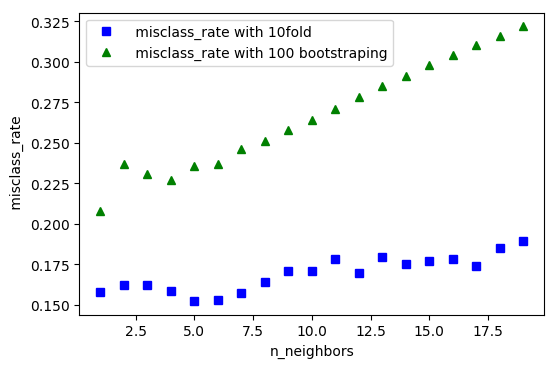

In [7]:

#Optimize the value for the number of neighbors k 
# on a stratified subsample (e.g. 10%) of the data

# Use 10-fold crossvalidation and  
# plot k against the misclassification rate.  
#Which value of k should you pick?
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Using 10% subsample datapoints
X_Sample, _, y_Sample, _ = train_test_split(X, y, train_size=0.01, random_state=0,stratify=y)


bootstrap=ShuffleSplit(n_splits=100,test_size=0.66,train_size=0.34,random_state=1)


# Build a list of the training accuracy and misclassification rates for increasing k

misclass_rate=[]
misclass_brate=[]
k = range(1, 20)
best_score = 0
best_bscore=0 

for n_neighbors in k:
    # build the model, using kfold CV to find best k
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_Sample, y_Sample)
    
    
    # record training and test set misclassfiction rate
    this_scores = cross_val_score(clf, X_Sample, y_Sample, cv=10,n_jobs=-1)
    mscores=np.mean(this_scores)
    misclass_rate.append(1-mscores)
    
    
    # if we got a better score, store the score and parameters
    if mscores > best_score:
            best_score = mscores
            best_parameters = {'k Neighbour with 10Fold': n_neighbors}
            
            
    # record training and test set misclassfiction rate using 100bootstraping 
    this_bscores = cross_val_score(clf, X_Sample, y_Sample, cv=bootstrap,n_jobs=-1)
    mbscores=np.mean(this_bscores)
    misclass_brate.append(1-mbscores)
    
    
    # if we got a better score, store the score and parameters
    if mbscores > best_bscore:
            best_bscore = mbscores
            best_bparameters = {'k Neighbour with 100 bootstraping': n_neighbors}
    
    
plt.plot(k,  misclass_rate,'bs', label=" misclass_rate with 10fold")
plt.plot(k,  misclass_brate,'g^', label=" misclass_rate with 100 bootstraping")
print('best_parameters%s ' %(best_parameters))
print('best_bparameters%s ' %(best_bparameters))
plt.ylabel(" misclass_rate")
plt.xlabel("n_neighbors")
_ = plt.legend()








We found that the best number of neighbour for 10-fold crossvalidation is 5, while that for 100 bootstrapping CV is 1. We think the difference because of that CV uses sampling with  and without replacement. Bootstraps include only 66% data points on average,however sampling without replacement include almost all data points. It is expectable that the results would be different. Indeed we noticed that, with same number of neighbours, the misclassfiction rate with 10 fold is strictly lower than 100 bootstraping.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

X_Sample, _, y_Sample, _ = train_test_split(X, y, train_size=0.01, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X_Sample, y_Sample, train_size=0.5,stratify=y_Sample, random_state=0)



            
            
            


from sklearn import neighbors, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

# build the model, using kfold CV to find best k
clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
logreg = LogisticRegression().fit(X_train, y_train)
linear_svm=LinearSVC().fit(X_train,y_train)
   
print('KNN score: %f' % clf.fit(X_train, y_train).score(X_test, y_test))
print('LogisticRegression score: %f' %logreg.fit(X_train, y_train).score(X_test, y_test))   
print('LInearSVM score: %f' %linear_svm.fit(X_train, y_train).score(X_test, y_test))
            
            
            

KNN score: 0.717143
LogisticRegression score: 0.828571
LInearSVM score: 0.825714


Test accuracy of l1 logreg with C=0.001: 0.76
Test accuracy of l2 logreg with C=0.001: 0.83
Test accuracy of l1 logreg with C=0.100: 0.79
Test accuracy of l2 logreg with C=0.100: 0.83
Test accuracy of l1 logreg with C=1.000: 0.80
Test accuracy of l2 logreg with C=1.000: 0.83
Test accuracy of l1 logreg with C=10.000: 0.83
Test accuracy of l2 logreg with C=10.000: 0.83
Test accuracy of l1 logreg with C=100.000: 0.82
Test accuracy of l2 logreg with C=100.000: 0.83
Best score with penalty L1: 0.83
Best parameters with penalty L1: {'C': 10}
Best score with penalty L2: 0.83
Best parameters with penalty L2: {'C': 0.001}


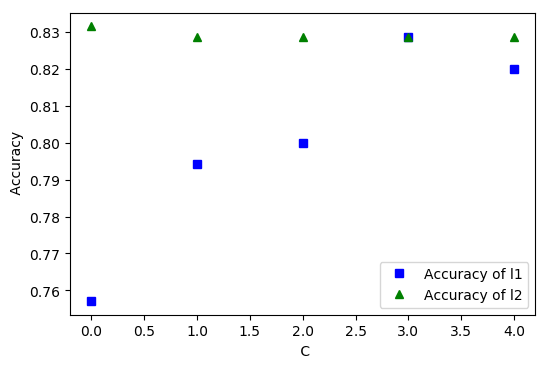

In [9]:
accuracy1 = []
accuracy2 = []
#Scale hyperparameter C
CC = [0.001,0.1, 1,10, 100]
best_score = 0
best_score1=0
for c in CC :
    logreg1 = LogisticRegression(C=c, penalty="l1").fit(X_train, y_train)
    score1 = logreg1.score(X_test, y_test)
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          c, score1))
    accuracy1.append(score1)
    if score1 > best_score:
            best_score = score1
            best_parameters = {'C': c}

    logreg2 = LogisticRegression(C=c, penalty="l2").fit(X_train, y_train)
    score2 = logreg2.score(X_test, y_test)
    print("Test accuracy of l2 logreg with C={:.3f}: {:.2f}".format(
          c, score2))
    accuracy2.append(score2)
    if score2 > best_score1:
            best_score1 = score2
            best_parameters1 = {'C': c}
            
            
print("Best score with penalty L1: {:.2f}".format(best_score))
print("Best parameters with penalty L1: {}".format(best_parameters))
print("Best score with penalty L2: {:.2f}".format(best_score1))
print("Best parameters with penalty L2: {}".format(best_parameters1))
plt.plot(accuracy1, 'bs', label="Accuracy of l1" )
plt.plot(accuracy2, 'g^', label="Accuracy of l2" )
plt.ylabel(" Accuracy")
plt.xlabel(" C")
_ = plt.legend()

C:\Users\s167817\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


Test accuracy of l1 logreg with C=100.000: 0.79
Test accuracy of l2 logreg with C=100.000: 0.83


C:\Users\s167817\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


Test accuracy of l1 logreg with C=100.000: 0.81
Test accuracy of l2 logreg with C=100.000: 0.83


C:\Users\s167817\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


Test accuracy of l1 logreg with C=100.000: 0.81
Test accuracy of l2 logreg with C=100.000: 0.83


C:\Users\s167817\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


Test accuracy of l1 logreg with C=100.000: 0.81
Test accuracy of l2 logreg with C=100.000: 0.83


C:\Users\s167817\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\svm\classes.py:199: DeprecationWarning: loss='l2' has been deprecated in favor of loss='squared_hinge' as of 0.16. Backward compatibility for the loss='l2' will be removed in 1.0
  DeprecationWarning)


Test accuracy of l1 logreg with C=100.000: 0.79
Test accuracy of l2 logreg with C=100.000: 0.83
Best score using SVC with penalty L1: 0.81
Best parameters using SVC with penalty L1: {'C': 100}
Best score  using SVC with penalty L2: 0.83
Best parameters using SVC with penalty L2: {'C': 100}


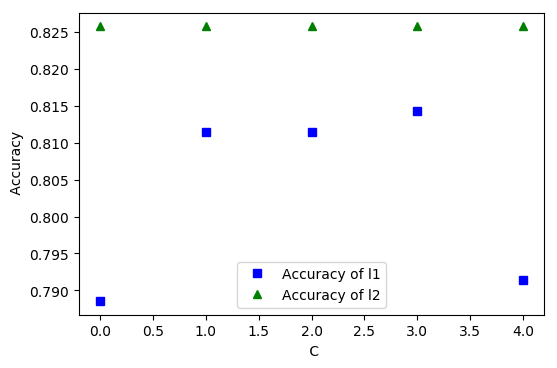

In [10]:
from sklearn.svm import LinearSVC
from sklearn.svm import l1_min_c

accuracy1_svc = []
accuracy2_svc = []
cs = l1_min_c(X_train, y_train)
best_score = 0
best_score1=0

for C in [0.001,0.1, 1,10, 100]: 
    svc1 = LinearSVC(C=C, loss='l2', penalty='l1', dual=False).fit(X_train, y_train)
    score1_svc = svc1.score(X_test, y_test)
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          c, score1_svc))
    accuracy1_svc.append(score1_svc)
    if score1_svc > best_score:
            best_score = score1_svc
            best_parameters = {'C': c}

    svc2 = LinearSVC(C=C, penalty="l2").fit(X_train, y_train)
    score2_svc = svc2.score(X_test, y_test)
    print("Test accuracy of l2 logreg with C={:.3f}: {:.2f}".format(
          c, score2_svc))
    accuracy2_svc.append(score2_svc)
    if score2_svc > best_score1:
            best_score1 = score2_svc
            best_parameters1 = {'C': c}
            
print("Best score using SVC with penalty L1: {:.2f}".format(best_score))
print("Best parameters using SVC with penalty L1: {}".format(best_parameters))
print("Best score  using SVC with penalty L2: {:.2f}".format(best_score1))
print("Best parameters using SVC with penalty L2: {}".format(best_parameters1))

plt.plot(accuracy1_svc, 'bs', label="Accuracy of l1" )
plt.plot(accuracy2_svc, 'g^', label="Accuracy of l2" )
plt.ylabel(" Accuracy")
plt.xlabel(" C")
_ = plt.legend()


Logistic Regression and SVM are more accuracy than the KNN. \\


When using logesticRegression:\\
The best C with penalty L1 is 10, whereas the best C with penalty L2 is 0.001. We noticed that the LogisticRegression with L2 penalty  is much more accurate that with L1 penalty. This result may due to the fact that L1 loss functions has sparse representations, while L2 loss functions has non-zero weights for datapoints.

When using SVM:\\
Different choice of penalty gave same best parameter C=100. We think this result may not perfect since L1 loss function is different from L2 loss function, however due to the short of time, we will consider this problem later.

## Model selection (4 points (2+2))
Study how RandomForest hyperparameters interact on the Ionosphere dataset (OpenML ID 59).

- Optimize a RandomForest, varying both $n\_estimators$ and $max\_features$ at the same time. Use a nested cross-validation and a grid search (or random search) over the possible values, and measure the AUC. Explore how fine-grained this grid/random search can be, given your computational resources. What is the optimal AUC performance you find?
- Again, vary both hyperparameters, but this time use a grid search and visualize the results as a plot (heatmap) $n\_estimators \times max\_features \rightarrow AUC$ with AUC visualized as the color of the data point. Try to make the grid as fine as possible. Interpret the results. Can you explain your observations? What did you learn about tuning RandomForests?

Hint: Running this experiment can take a while, so start early and use a feasible grid/random search. Start with a coarse grid or few random search iterations.
Hint: Use a log scale (1,2,4,8,16,...) for $n\_estimators$. Vary $max\_features$ linearly between 1 and the total number of features. Note that, if you give $max\_features$ a float value, it will use it as [the percentage of the total number of features](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).


In [2]:
ionosphere = oml.datasets.get_dataset(59) # Download Ionosphere data
X, y = ionosphere.get_data(target=ionosphere.default_target_attribute);
# Get the predictors X and the labels y

NameError: name 'oml' is not defined

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import random

#Scale n_estimators and max_features
n_estimators=np.logspace(0,5,num=6,base=2)
n_estimators=np.int_(n_estimators)
(_,n_features)=X.shape



X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


max_features=range(1,n_features)
#max_features=max_features[:len(n_estimators)]
max_features = [1,5,10,15,20,25]
scores=[]   
scores1=[]
    

    
#Nested-CS + Random Search
param_grid = {'n_estimators': np.array(n_estimators),  'max_features': max_features}
#random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, n_iter=5,cv=5)
#random_search.fit(X_train, y_train)

#Grid Search
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_search.fit(X_train, y_train)

nested_scores1 = cross_val_score(grid_search,X,y, cv=5,n_jobs=-1)
scores1.append(np.mean(nested_scores1))


# AUC Score for Random Forest

gd_auc = roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1])




print("Accuracy on nested_scores: {}".format(nested_scores1))
print("Mean Accuracy on nested_scores: {}".format(scores1))
print("Best parameters: {}".format(grid_search.best_params_))
print("AUC : {:.3f}".format(gd_auc))




GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([ 1,  2,  4,  8, 16, 32]), 'max_features': [1, 5, 10, 15, 20, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Accuracy on nested_scores: [ 0.93   0.929  0.914  0.986  0.957]
Mean Accuracy on nested_scores: [0.94305835010060357]
Best parameters: {'max_features': 1, 'n_estimators': 32}
AUC : 0.998


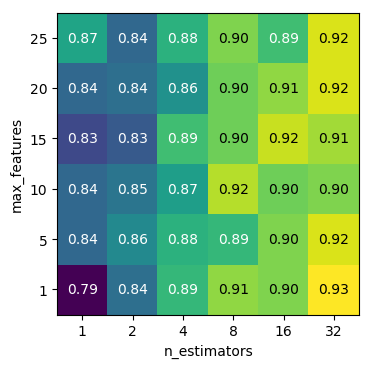

In [13]:
import pandas as pd
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)

#make same dimensions
n_estimators=np.array(n_estimators)
#max_features=range(1,n_features)


scores = np.array(results.mean_test_score).reshape(len(n_estimators),len(max_features))
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='n_estimators', xticklabels=param_grid['n_estimators'],ylabel='max_features',
                      yticklabels=param_grid['max_features'], cmap="viridis");



We found the optimal AUC performance is  0.998 using a nested CV and a grid search.


From the heat map, we see that generally, for a fixed max_features, test accuracy increases if the number of trees increases. If the number of trees is fixed, we notice that the prediction accuacy are almost same when n_estimators=[8,16,32]. And no obvious trend has been found when n_esitimators=[1 2 4]. Also the best parameter has been found as max_features=1 and n_estimators=32 and the minimum score happens at point(1,1). Therefore we make a guess that the best model that we could find if this model has a large number of trees but using a few features. 

## Decision tree heuristics (1 point)
Consider the toy training set created below. It predicts whether your date agrees to go out with you depending on the weather.

Learn a decision tree:

- Implement functions to calculate entropy and information gain
- What is the class entropy for the entire dataset? What is the information gain when you split the data using the *Water* feature?
- Implement a basic decision tree:
    - Select a feature to split on according to its information gain. If multiple features are equally good, select the leftmost one.
    - Split the data and repeat until the tree is complete.
    - Print out the results (nodes and splits).
- Now train a scikit-learn decision tree on the same data. Do you get the same result? Explain.

In [14]:
df = pd.DataFrame({"Sky":['sunny','sunny','rainy','sunny','sunny'],
                   "AirTemp":['warm','warm','warm','cold','warm'],
                   "Humidity":['normal','high','high','high','normal'],
                   "Wind":['strong','strong','strong','strong','weak'],
                   "Water":['warm','warm','cool','warm','warm'],
                   "Forecast":['same','same','change','change','same'],
                   "Date?":['yes','yes','no','yes','no']
                   });

df = df[['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast', 'Date?']] # Fix column ordering



In [15]:
# Complete these functions first
def entropy(pos, neg):
    if (pos !=0) & (neg !=0):
        k=pos+neg
        return -(pos/k)*np.log2(pos/ k)-(neg/k)*np.log2(neg/k)
    else:
        return 0
    
def info_gain(pos1,neg1,pos2,neg2):
    k=pos+neg
    m=pos1+neg1+pos2+neg2
    sub_m1=(pos1+neg1)/k
    sub_m2=(pos2+neg2)/k
    
    entropy_1=entropy(pos1,neg1)
    entropy_2=entropy(pos2,neg2)
    
    return  entropy(pos,neg)-(sub_m1*entropy_1+sub_m2*entropy_2)



In [16]:


#Counting negtive results of all data
neg=0
for object in df['Date?']:
    if object !='yes':
           neg +=1
                        
# Calculate positive results            
pos=df.shape[0]-neg




#Construct two sub-dataframe
subdf_water1=pd.DataFrame(index=df.index,columns=df.columns)
subdf_water2=pd.DataFrame(index=df.index,columns=df.columns)


#Split the dataframe w.r.t column Water
for i in range(0,df.shape[0]) :
        if df.iloc[i,4] =='warm':
            subdf_water1.loc[i,:]=df.loc[i,:]
        else:
             subdf_water2.loc[i,:]=df.loc[i,:]
        i=i+1
   



 #rearrange datatfram
subdf_water1=subdf_water1[subdf_water1.Water =='warm']
subdf_water2=subdf_water2[subdf_water2.Water =='cool']


#Counting negtive results of warm Water
neg1=0
for object in subdf_water1['Date?']:
    if object !='yes':
           neg1 +=1
            
            
# Calculate positive results  for warm Watere           
pos1=subdf_water1.shape[0]-neg1


#Counting negtive results of cool Water
neg2=0
for object in subdf_water2['Date?']:
    if object !='yes':
           neg2 +=1
            
# Calculate positive results  for cool water        
pos2=subdf_water2.shape[0]-neg2

print("entropy of all data: {}".format(entropy(pos,neg)))
print("info gain w.r.t Water of all data: {}".format(info_gain(pos1,neg1,pos2,neg2)))


entropy of all data: 0.9709505944546686
info gain w.r.t Water of all data: 0.3219280948873623


Hence the entropy of all data is 0.97 and the info gain w.r.t water is 0.32.

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

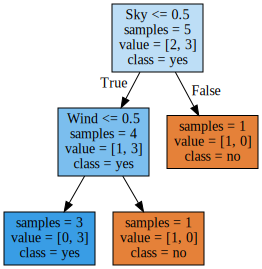

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

df2 = df.copy()
for col in df2:
    for i, val in enumerate(set(df2[col])):
        df2.loc[df2[col] == val, col] = i

features = ['AirTemp','Forecast','Humidity','Sky','Water','Wind']
X = np.array(df2[features], dtype=np.int)
y = np.array(df2[['Date?']], dtype=np.int)

dc = DecisionTreeClassifier(criterion='entropy');
dc.fit(X, y);
export_graphviz(dc, out_file="tree.dot", class_names=["no", "yes"], 
                feature_names=features, impurity=False, filled=True);

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [18]:
from sklearn import tree


dataSet=[['sunny', 'warm', 'normal', 'strong', 'warm', 'same', 'yes'],
       ['sunny', 'warm', 'high', 'strong', 'warm', 'same', 'yes'],
       ['rainy', 'warm', 'high', 'strong', 'cool', 'change', 'no'],
       ['sunny', 'cold', 'high', 'strong', 'warm', 'change', 'yes'],
       ['sunny', 'warm', 'normal', 'weak', 'warm', 'same', 'no']] 
#Sky -> 0:sunny
#AirTem -> 0:warm
#Humidity -> 0:normal
#Wind -> 0:strong
#Water -> 0:warm
#Forcast -> 0:same
#Date -> 0:date

#Create Dataset

dataSet=[[0, 0, 0, 0, 0, 0, 'yes'],
       [0, 0, 1, 0, 0, 0, 'yes'],
       [1, 0, 1, 0, 1, 1, 'no'],
       [0, 1, 1, 0, 0, 1, 'yes'],
       [0, 0, 0, 1, 0, 0, 'no']]



labels=['Sky', 'AirTemp', 'Humidity', 'Wind', 'Water', 'Forecast']


In [19]:

def Entropy(dataSet):

    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        #Counting the number of each values' appearance
        labelCounts[currentLabel] += 1      
    entropy = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        entropy -= prob * np.log2(prob)
    return entropy


In [20]:
import operator
import time


# Split dataset for the given  features 
def splitDataSet(dataSet, axis, value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis] == value:
            reducedFeatVec=np.append(featVec[:axis],featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet



In [21]:
def chooseBestFeatureToSplit(dataSet):
    
    #the number of features
    numFeatures = len(dataSet[0]) - 1
    #the entropy of all dataset
    baseEntropy = Entropy(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        #Construct a list for each Feature
        featList = [example[i] for example in dataSet]
        #the set of unique values in the feature list
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet) / float(len(dataSet[0]))
            newEntropy += prob * Entropy(subDataSet)
        #the info Gain for this feature    
        infoGain = baseEntropy -newEntropy
        #Return Best Feature
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature


def majorityCnt(classList):

    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.iteritems(), key=operator.itemgetter(1), reversed=True)
    return sortedClassCount[0][0]



In [22]:
import treePlotter

def createTree(dataSet, labels):

    classList = [example[-1] for example in dataSet]         
    if classList.count(classList[0]) == len(classList):
        #if each element in classList are identicle, dont do classify
        return classList[0]                                  
    if len(dataSet[0]) == 1:                                  
        # Return the most number of occurence
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)                
    bestFeatLabel = labels[bestFeat]                              
    myTree = {bestFeatLabel:{}}                   
        
    del(labels[bestFeat])                                           
    featValues = [example[bestFeat] for example in dataSet]       
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]                                
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
        
    return myTree


labels_tmp = labels[:]
desicionTree = createTree(dataSet, labels_tmp)
print("Tree : {}".format(desicionTree))



Tree : {'Sky': {0: {'Wind': {'0': 'yes', '1': 'no'}}, 1: 'no'}}


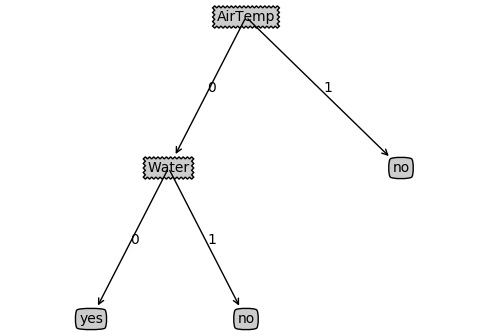

In [23]:
desicionTree = createTree(dataSet, labels_tmp)
treePlotter.createPlot(desicionTree)

Our decisionTree is {'Sky': {0: {'Wind': {'1': 'no', '0': 'yes'}}, 1: 'no'}} namely, {'Sky': {sunny: {'Wind': {'mild': 'no', 'strong': 'yes'}}, rainy: 'no'}}. Yet we don't have any clue about why the tree plotter didnt give the right result.\\
However, the decision tree from DecisionTreeClassifier varies from time to time. For instance, the last output is  {'Sky': {True: {'Wind': {'True': 'yes', 'False': 'no'}}, False: 'no'}}. The variation for the output may due to the fact the DecisinTreeClassifier has to split the data randomly first, hence each time we may get different result.




## Random Forests (4 points (1+1+2))
Study the effect of the number of trees in a RandomForest on the EEG-eye-state dataset (http://www.openml.org/d/1471). This dataset measures brain activity using 15 sensors, and you need to predict whether the person's eyes are open or closed. 

* Train a RandomForest classifier on this dataset with an increasing number of trees (on a log scale as above). Plot the Out-Of-Bag error against the number of trees.
    - The Out-Of-Bag error is the test error obtained when using bootstrapping, and using the non-drawn data points as the test set. This is what a RandomForest does internally, so you can retrieve it from the classifier. The code below hints on how to do this.
* Construct the same plot, but now use 10-fold Cross-validation and error rate instead of the OOB error. Compare the two. What do you learn from this?
* Compare the performance of the RandomForest ensemble with that of a single full decision tree. Compute the AUC as well as the bias and variance. Does the bias and variance increase/decrease for the ensemble? Does the number of trees affect the result?

Hint: Error rate = 1 - accuracy  
Hint: We discussed bias-variance decomposition in class. It is not included in scikit-learn, so you'll need to implement it yourself.

In [6]:
eeg = oml.datasets.get_dataset(1471) # Download Ionosphere data
X, y = eeg.get_data(target=eeg.default_target_attribute);

In [8]:
X.shape
y.shape

(14980, 14)

(14980,)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=4, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=8, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=16, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=32, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=256, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=512, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

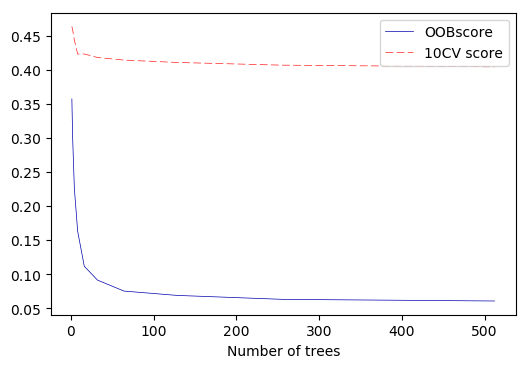

In [25]:
# Out of bag errors can be retrieved from the RandomForest classifier. You'll need to loop over the number of trees.
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html
from sklearn import ensemble

oobscore=[]
cvscore=[]
biases, variances = [], []



#Scale n_estimators
n_range=[2**i for i in range(10)]


for n_e in n_range:
    clf = ensemble.RandomForestClassifier(n_estimators=n_e,n_jobs=-1,oob_score=True);
    clf.fit(X,y);
    results= 1 - clf.oob_score_
    oobscore.append(results)
    
    clf = ensemble.RandomForestClassifier(n_estimators=n_e,n_jobs=-1);
    clf.fit(X,y)
    acc = cross_val_score(clf, X, y, cv=10, n_jobs=-1) 
    cvscore.append(1-np.mean(acc))
    
plt.plot(n_range, oobscore,label='OOBscore') 
plt.plot(n_range, cvscore,label='10CV score')
plt.xlabel('Number of trees')
_=plt.legend(loc='best')

The figure shows the OOb estimator gives a better estimate of the test loss. As you can see, OOB error is much lower than 10-fold CV error. Also, OOb error rapidly decrease between interval [0,100], then keep steady trend relatively small. While, 10-fold error almost remain constant around 0.4 which is bigger than the maximum of OOB error. \\


In [26]:



def compute_bias_variance(estimator,X,y):
    clf =estimator

    # Bootstraps
    n_repeat = 100
    shuffle_split = ShuffleSplit(test_size=0.33, n_splits=n_repeat)

    # Store sample predictions
    y_all_pred = [[] for _ in range(len(y))]

    # Train classifier on each bootstrap and score predictions
    for i, (train_index, test_index) in enumerate(shuffle_split.split(X)):
        # Train and predict
        clf.fit(X[train_index], y[train_index])
        y_pred = clf.predict(X[test_index])

        # Store predictions
        for i,index in enumerate(test_index):
            y_all_pred[index].append(y_pred[i])
        
    # Compute bias, variance, error
    bias_sq = sum([ (1 - x.count(y[i])/len(x))**2 * len(x)/n_repeat 
                for i,x in enumerate(y_all_pred)])
    var = sum([((1 - ((x.count(0)/len(x))**2 + (x.count(1)/len(x))**2))/2) * len(x)/n_repeat
           for i,x in enumerate(y_all_pred)])
    error = sum([ (1 - x.count(y[i])/len(x)) * len(x)/n_repeat 
            for i,x in enumerate(y_all_pred)])

    return bias_sq,var,error, print("Estimator: %s,Bias squared: %.2f, Variance: %.2f, Total error: %.2f" % (estimator,bias_sq, var, error))

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size=0.6, stratify=y)

rf=RandomForestClassifier(n_estimators=20,n_jobs=-1)
rf.fit(X_train,y_train)
bias_rf,var_rf,_,_=compute_bias_variance(rf,X,y)

# AUC Score for Random Forest
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

dt = DecisionTreeClassifier();
dt.fit(X_train, y_train);
bias_dt,var_dt, _, _ =compute_bias_variance(rf,X,y)
# AUC Score for Decision Tree Classifier
de_auc= roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]);



print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for Decision Tree Classifier: {:.3f}".format(de_auc))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),Bias squared: 269.76, Variance: 190.25, Total error: 460.01


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),Bias squared: 267.79, Variance: 187.48, Total error: 455.27
AUC for Random Forest: 0.997
AUC for Decision Tree Classifier: 0.820


Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),Bias squared: 383.14, Variance: 687.88, Total error: 1071.02
Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=2, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),Bias squared: 512.74, Variance: 515.02, Total error: 1027.76
Estimator: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
   

<function matplotlib.pyplot.show>

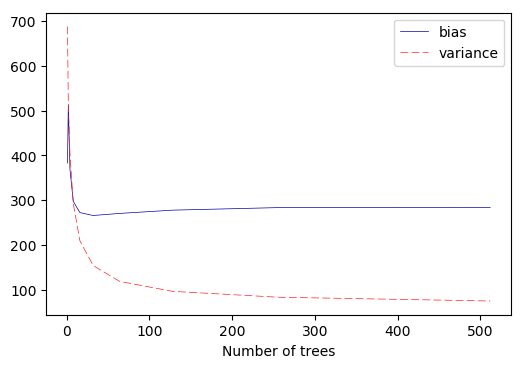

In [28]:

bias_all=[]
var_all=[]
error_all=[]
rf_auc_all=[]
n_range=[2**i for i in range(10)]
for n_e in n_range:
    bias_sq, var, error, _ =compute_bias_variance(RandomForestClassifier(n_estimators=n_e,n_jobs=-1),X,y)
    bias_all.append(bias_sq)
    var_all.append(var)
    error_all.append(error)


plt.plot(n_range, bias_all,label="bias") 
plt.plot(n_range, var_all,label='variance')
plt.xlabel('Number of trees')
_=plt.legend()
plt.show

The figure shows that both bias and variance drop sharply around zero number of trees and remain steady afterwards. The number of trees don't infunce the bias and variance after a certain point.

## A regression benchmark (1 point)
Consider the liver-disorder dataset (http://www.openml.org/d/8). The goal is to predict how much alcohol someone consumed based on blood test values.

- Take a selection of the algorithms that we covered in class that can do regression.
- Based on what you learned in the previous exercises, make educated guesses about good hyperparameter values and set up a grid or random search.
- Evaluate all models with 10-fold cross-validation and root mean squared error (RMSE). Report all results. Which model yields the best results?

In [29]:
liver = oml.datasets.get_dataset(8) # Download Liver-disorders data
X, y = liver.get_data(target=liver.default_target_attribute);

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression,Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lr = LinearRegression().fit(X_train, y_train)
scores = cross_val_score(lr, X, y,cv=10, scoring='neg_mean_squared_error');
scores_min = np.sqrt(-scores.min())
scores_max= np.sqrt(-scores.max())
scores_mean=np.mean(-scores)
print("scores of LinearRegression: mininum:{},maximum:{}".format(scores_min,scores_max))

param_grid = {
    'n_estimators': [2**x for x in range(4, 9)],
    'max_features': [1.0 / x for x in range(1, 11)],
}

def gridsearch(estimator, param_distributions):
    
    grid_search = RandomizedSearchCV(estimator, param_distributions
                                       , n_iter=5,cv=10)
    grid_search.fit(X, y)
    model = grid_search.best_estimator_
    scores = cross_val_score(model, X, y,
                             cv=10, scoring='neg_mean_squared_error');
    
    scores_min = np.sqrt(-scores.max())
    scores_max= np.sqrt(-scores.min())
    
    print("scores of {}: mininum:{},maximum:{}".format(estimator.__class__.__name__,scores_min,scores_max))
    
    return -grid_search.best_score_

scores_lasso = gridsearch(Lasso(), {'alpha': [2**x for x in range(-10, 11)]});

scores_ridge = gridsearch(Ridge(), {'alpha': [2**x for x in range(-10, 11)]});


from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from scipy.stats import distributions

def randsearch(estimator, param_distributions):
    
    random_search = RandomizedSearchCV(estimator, param_distributions
                                       , n_iter=5,cv=10)
    random_search.fit(X, y)
    model = random_search.best_estimator_
    scores = cross_val_score(model, X, y,
                             cv=10, scoring='neg_mean_squared_error');
    
    scores_min = np.sqrt(-scores.max())
    scores_max= np.sqrt(-scores.min())
    
    print("scores of {}: mininum:{},maximum:{}".format(estimator.__class__.__name__,scores_min,scores_max))
    
    return -random_search.best_score_

scores_rfr = randsearch(RandomForestRegressor(), param_grid);

scores_gbr = randsearch(GradientBoostingRegressor(), param_grid);



print("scores of Lasso(): {}".format(scores_lasso))
print("scores of Ridge(): {}".format(scores_ridge))
print("scores of RandomForestRegressor: {}".format(scores_rfr))
print("scores of GradientBoostingRegressor:{}".format(scores_gbr))


labels=['Lasso','Ridge','RandomForestRegressor','GradientBoostingRegressor']
data=[scores_lasso,scores_ridge,scores_rfr,scores_gbr]
df=pd.DataFrame(data,index=labels)
df.T


scores of LinearRegression: mininum:6.115966526572714,maximum:1.5382970961753724
scores of Lasso: mininum:1.2760359575169857,maximum:6.736056160109215
scores of Ridge: mininum:1.5358927398411577,maximum:6.1201658896607185
scores of RandomForestRegressor: mininum:1.6205631930841258,maximum:5.944674684496384
scores of GradientBoostingRegressor: mininum:1.2514189603398047,maximum:6.1838772414096805
scores of Lasso(): 12.338632534698924
scores of Ridge(): 13.021211143534961
scores of RandomForestRegressor: 13.862100753390353
scores of GradientBoostingRegressor:13.076178643730355


,Lasso,Ridge,RandomForestRegressor,GradientBoostingRegressor
0,12.34,13.02,13.86,13.08


These four regression method have smilar root mean square error. Lasso model yields the best results.